In [33]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [34]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 20

In [35]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
directory='train_set',
seed=123,
shuffle = True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 924 files belonging to 7 classes.


In [36]:
class_names = dataset.class_names
class_names


['BA- cellulitis',
 'BA-impetigo',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [37]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 255, 255, 3)
Single Image :  tf.Tensor(
[[[140.        87.        69.      ]
  [138.3647    85.36471   67.36471 ]
  [140.08824   85.        69.088234]
  ...
  [196.30392  149.       143.60785 ]
  [197.18236  149.18236  145.18236 ]
  [198.       150.       146.      ]]

 [[139.18236   86.18235   68.18235 ]
  [138.2156    85.21561   67.21561 ]
  [140.08824   85.        69.088234]
  ...
  [196.30392  149.2485   143.35934 ]
  [197.18236  150.       144.36472 ]
  [198.       150.81764  145.18236 ]]

 [[138.30392   86.696075  69.39216 ]
  [137.48628   85.878426  68.57451 ]
  [138.90762   85.696075  70.48039 ]
  ...
  [196.30392  149.30392  141.91177 ]
  [197.18236  150.18236  142.7902  ]
  [198.       151.       143.60785 ]]

 ...

 [[171.69608  104.303925  91.60785 ]
  [173.90051  106.50836   93.81229 ]
  [174.39215  107.        95.27297 ]
  ...
  [200.77187  203.77187  210.77187 ]
  [194.56978  197.56978  204.56978 ]
  [197.69608  200.69608  207.69608 ]]

 [[171. 

In [38]:
len(class_names)

7

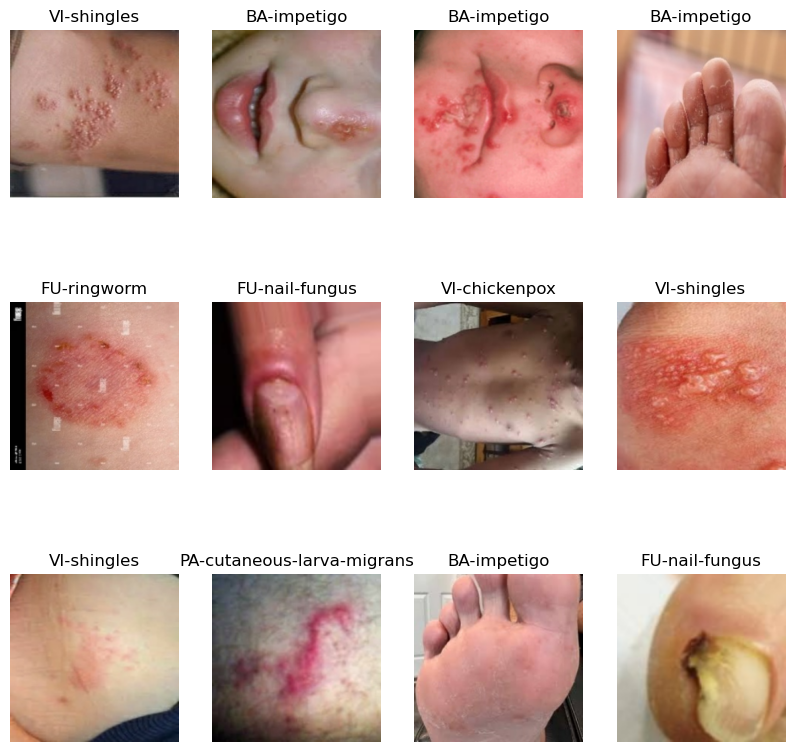

In [39]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [40]:
len(dataset)

29

In [41]:
train_size = 0.8
len(dataset) * train_size

23.200000000000003

In [42]:
train_ds = dataset.take(23)
len(train_ds)

23

In [43]:
test_ds = dataset.skip(23)
len(test_ds)

6

In [44]:
val_size = 0.1
len(dataset)*val_size

2.9000000000000004

In [45]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [46]:
test_ds = test_ds.skip(2)
len(test_ds)

4

In [47]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [48]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [49]:
from tensorflow.keras import layers
import tensorflow as tf

IMAGE_SIZE = 224  # Example image size, adjust as necessary

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])


In [50]:
from tensorflow.keras import layers
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [51]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
from tensorflow.keras import layers, models
import tensorflow as tf

IMAGE_SIZE = 224  # Example image size, adjust as necessary
CHANNEL = 3  # Number of color channels (e.g., 3 for RGB images)
n_classes = 7  # Adjust based on your number of classes

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Define the input shape without batch size
    resize_and_rescale,  # Your preprocessing layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# The model is now correctly built and can be compiled
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [57]:
# Assuming the model is already defined and compiled
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,719 (670.78 KB)

 Trainable params: 171,719 (670.78 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 783ms/step - accuracy: 0.1913 - loss: 1.9312 - val_accuracy: 0.1875 - val_loss: 1.9249
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 782ms/step - accuracy: 0.2213 - loss: 1.9139 - val_accuracy: 0.2656 - val_loss: 1.9192
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 793ms/step - accuracy: 0.2237 - loss: 1.9229 - val_accuracy: 0.1875 - val_loss: 1.9270
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 800ms/step - accuracy: 0.2178 - loss: 1.9088 - val_accuracy: 0.1875 - val_loss: 1.8193
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 799ms/step - accuracy: 0.2249 - loss: 1.8177 - val_accuracy: 0.2344 - val_loss: 1.7279
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 818ms/step - accuracy: 0.2736 - loss: 1.7434 - val_accuracy: 0.3281 - val_loss: 1.6716
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 751ms/step - accuracy: 0.3472 - loss: 1.6399 - val_accuracy: 0.3594 - val_loss: 1.6185
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 766ms/step - accuracy: 0.3464 - loss: 1.5953 - val_accu

In [60]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.5781 - loss: 1.1816


In [61]:
model.save("model.h5")

In [63]:
model.save('my_model.keras')

In [64]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 23}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [65]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.9335795640945435,
 1.9268802404403687,
 1.9266597032546997,
 1.8903590440750122,
 1.7880059480667114]

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

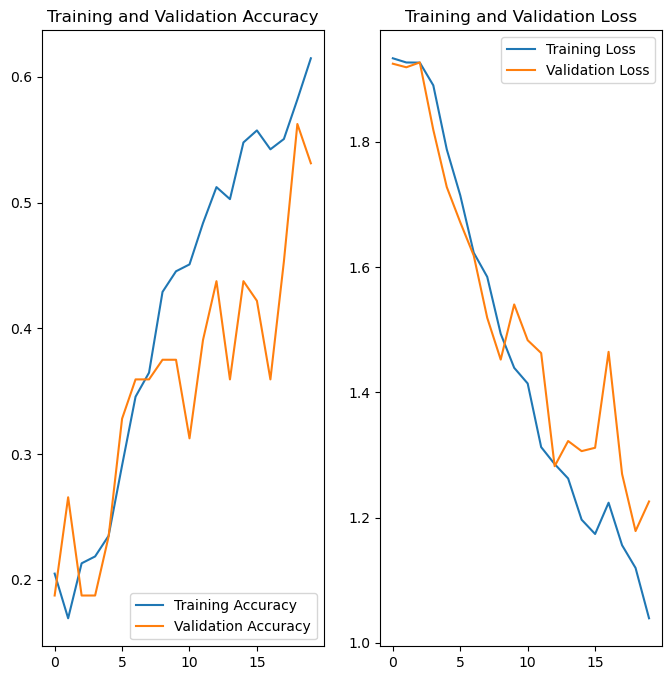

In [67]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
model = tf.keras.models.load_model('my_model.keras')

first image to predict
actual label: VI-chickenpox
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
predicted label: VI-chickenpox


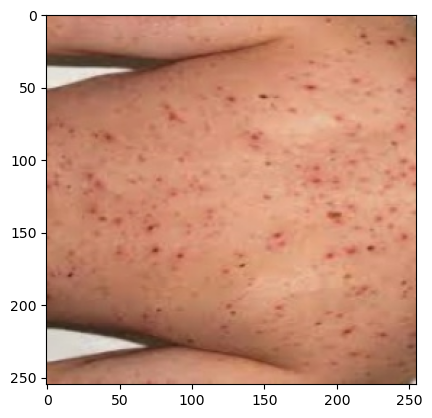

In [70]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


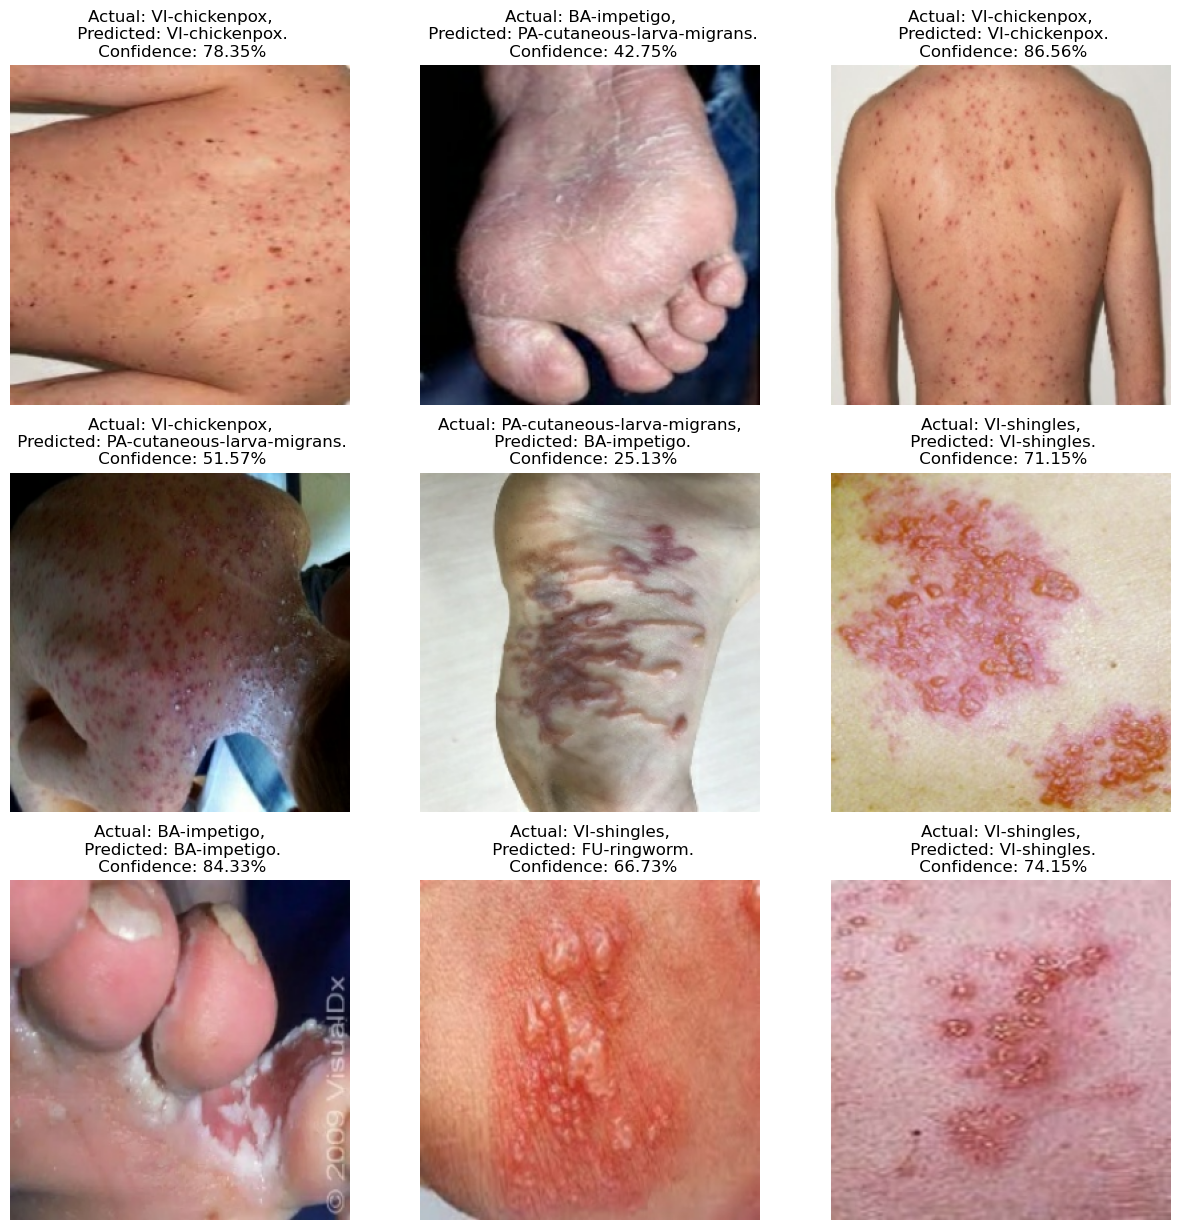

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")